<a href="https://colab.research.google.com/github/chiragoel/Shopify-Challenge/blob/master/Shopify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [2]:
base_path = '/content/drive/My Drive/shopify'

In [3]:
df = pd.read_excel(base_path+'/data.xlsx')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [ ]:
df['price_per_item'] = df['order_amount']/df['total_items']

In [68]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


In [30]:
#Function to check if the dataset contains only the dates within a month
def check_within_month(start,end,df):
  count = 0
  for i in df['created_at']:
    if np.datetime64(i)>= start and np.datetime64(i)<= end:
      count+=1
  return count==df.shape[0]

In [72]:
#Naive Approach
def naive_approach(df):
  return sum(np.asarray(df['order_amount']))/df.shape[0]

In [33]:
#Average order value using mean
def avg_per_product(df):
  return sum(np.asarray(df['order_amount']))/sum(np.asarray(df['total_items']))

In [73]:
start = datetime.datetime.strptime("01-03-2017", "%d-%m-%Y")
end = datetime.datetime.strptime("31-03-2017", "%d-%m-%Y")
flag = check_within_month(start,end,df)
if flag:
  AOV_naive = naive_approach(df)
  AOV = avg_per_product(df=df)
  print('Naive AOV',AOV_wrong)
  print('Correct AOV',AOV)

Naive AOV 3145.128
Correct AOV 357.92152221412965


Initially,only the order amount column is considered for calculation of AOV which is wrong as each order amount is for different quantity of items which are provided in the total_items column. So to get the correct value of AOV the correct approach will be to consider both the order_amount and total_items columns and perform the calculations as shown in the avg_per_product function.

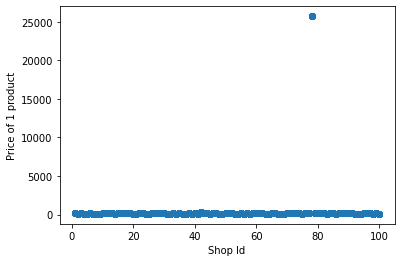

In [65]:
plt.scatter(df['shop_id'],df['price_per_item'])
plt.xlabel('Shop Id')
plt.ylabel('Price of 1 product')
plt.show()

The scatter plot represents the cost of each product cost by the shop under a single order id and it can be clearly seen that there is presence of outliers which hinder the calculation of the Average Order Value and make it biased towards value of outliers. So, here calculating the median will be a better option as the outliers will not have and effect on it.

In [66]:
#Average order value using median
def median_AOV(df):
  res = []
  for i in range(df.shape[0]):
    res.extend([df['price_per_item'].iloc[i]]*df['total_items'].iloc[i])
  return np.median(res)

In [70]:
print('New AOV',median_AOV(df))

New AOV 352.0


#**SQL**
All SQL commands

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


a. How many orders were shipped by Speedy Express in total? \\
SELECT count(*) \\
FROM Orders \\
LEFT JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID \\
where Shippers.ShipperName = 'Speedy Express' \\
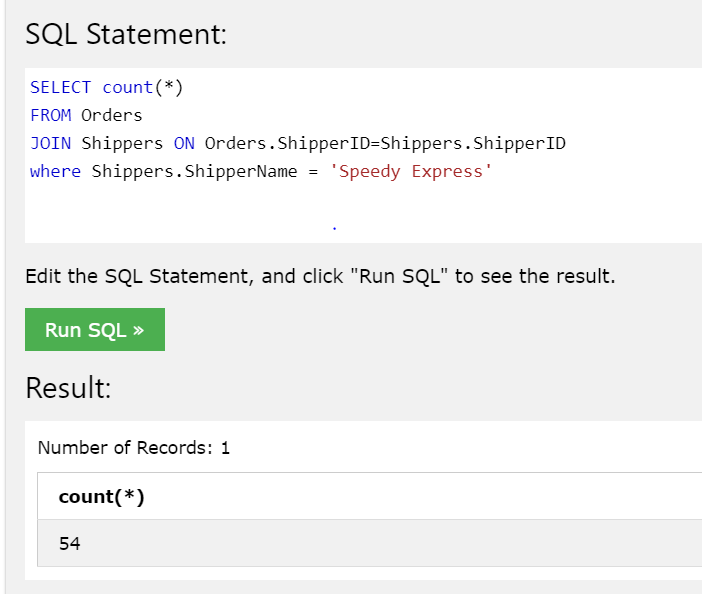

b. What is the last name of the employee with the most orders?
SELECT Employees.LastName,SUM(OrderDetails.Quantity) TotalOrders \\
FROM Orders \\
JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID \\
JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID \\
Group by \\
Orders.EmployeeID \\
Order BY \\
TotalOrders DESC LIMIT 1 \\
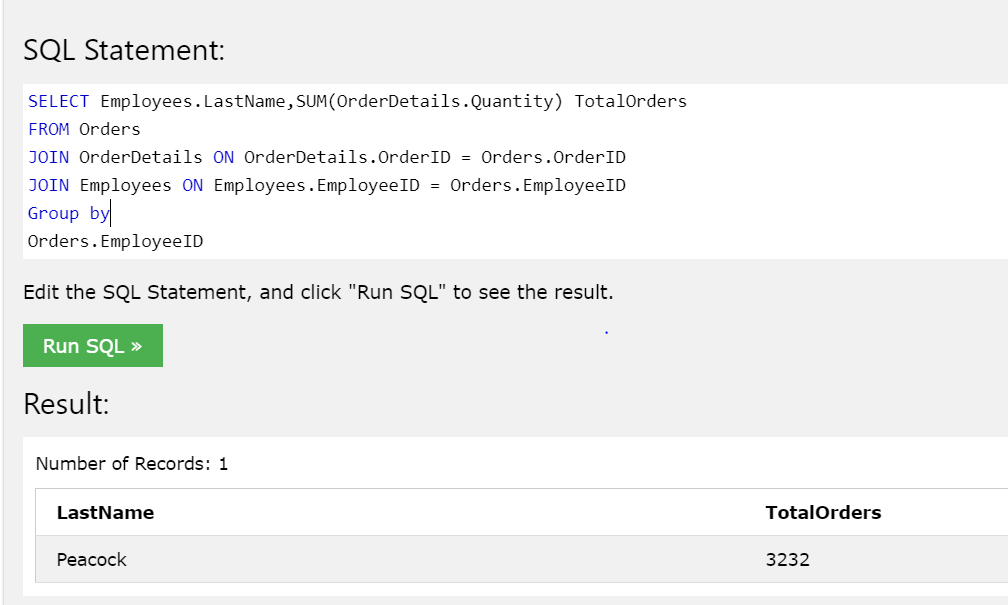


c. What product was ordered the most by customers in Germany? \\
SELECT Products.ProductName,MAX(Products.Unit) MostOrderedProduct \\
FROM Products \\ 
LEFT JOIN Suppliers on Suppliers.SupplierID = Products.SupplierID \\
where Suppliers.Country = 'Germany' \\
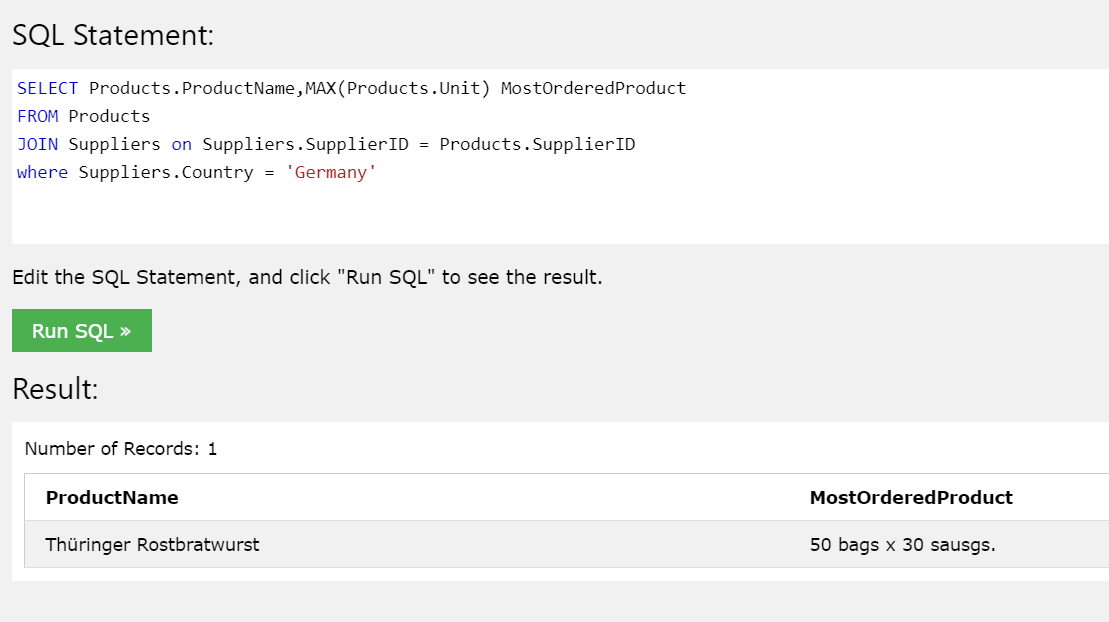
